**Logistic Modeling of Population Data**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Investigation A
* Used early population data (1800–2010)

* Calibrated a logistic model on early growth behavior
* Observed increasing underestimation after mid-20th century

* Identified structural model limitations (changing growth dynamics)

In [ ]:
t = np.array([-10,0,10,20,30,40,50,60,70,80,90,100,110])
P = np.array([3.929,5.308,7.240,9.638,12.861,17.064,23.192,31.443,38.558,50.189,62.980,76.212,92.228])

In [ ]:
P_prime = []
P_mid = []

for i in range(1, len(P)-1):
    derivata = (P[i+1] - P[i-1])/(t[i+1]-t[i-1])
    P_prime.append(derivata)
    P_mid.append(P[i])

P_prime = np.array(P_prime)
P_mid = np.array(P_mid)

print(P_prime)
print(P_mid)

[0.16555 0.2165  0.28105 0.3713  0.51655 0.71895 0.7683  0.9373  1.2211
 1.30115 1.4624 ]
[ 5.308  7.24   9.638 12.861 17.064 23.192 31.443 38.558 50.189 62.98
 76.212]


In [ ]:
Y=P_prime/P_mid
print(Y)

[0.03118877 0.02990331 0.02916061 0.02887023 0.03027133 0.03099991
 0.02443469 0.02430883 0.02433003 0.02065973 0.01918858]


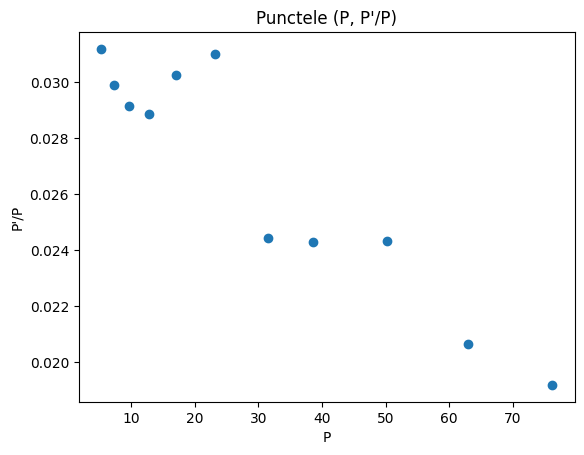

In [ ]:
plt.scatter(P_mid, Y)
plt.xlabel('P')
plt.ylabel("P'/P")
plt.title('Punctele (P, P\'/P)')
plt.show()

In [ ]:
coef = np.polyfit(P_mid, Y, 1)
b = coef[0]
a = coef[1]
print("a =", a)
print("b =", b)

a = 0.03176395963543105
b = -0.00016758298814024164


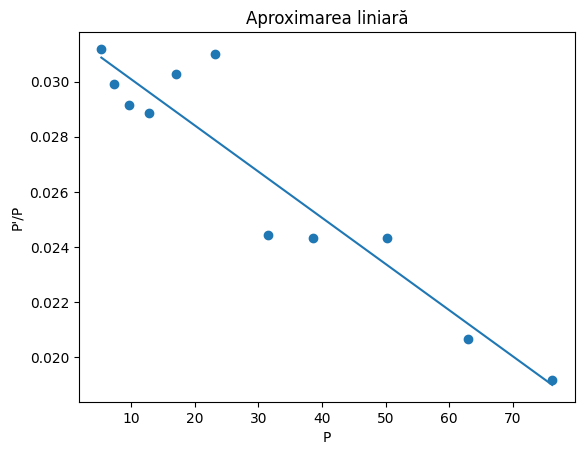

In [ ]:
P_line = np.linspace(min(P_mid), max(P_mid), 100)
Y_line = a + b * P_line

plt.scatter(P_mid, Y)
plt.plot(P_line, Y_line)
plt.xlabel('P')
plt.ylabel("P'/P")
plt.title('Aproximarea liniară')
plt.show()

In [ ]:
def logistic(P, t):
    return a*P + b*P**2

In [ ]:
P0 = P[1]
t_model = np.arange(0, 211, 10)
P_model = odeint(logistic, P0, t_model).flatten()

In [ ]:
years_real = np.array([1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010])

P_real = np.array([5.308,7.240,9.638,12.861,17.064,23.192,31.443,38.558,50.189,62.980,76.212,92.228,106.022,123.203,132.165,151.326,179.323,203.302,226.542,248.710,281.422,308.745])

In [ ]:
for i in range(len(years_real)):
    print(f"An: {years_real[i]}, Model: {P_model[i]:.2f}, Real: {P_real[i]:.2f}, "
          f"Eroare: {P_model[i]-P_real[i]:.2f}, "
          f"Eroare %: {(P_model[i]-P_real[i])/P_real[i]*100:.2f}%")


An: 1800, Model: 5.31, Real: 5.31, Eroare: 0.00, Eroare %: 0.00%
An: 1810, Model: 7.22, Real: 7.24, Eroare: -0.02, Eroare %: -0.32%
An: 1820, Model: 9.78, Real: 9.64, Eroare: 0.14, Eroare %: 1.43%
An: 1830, Model: 13.18, Real: 12.86, Eroare: 0.32, Eroare %: 2.46%
An: 1840, Model: 17.65, Real: 17.06, Eroare: 0.58, Eroare %: 3.41%
An: 1850, Model: 23.43, Real: 23.19, Eroare: 0.23, Eroare %: 1.01%
An: 1860, Model: 30.76, Real: 31.44, Eroare: -0.68, Eroare %: -2.16%
An: 1870, Model: 39.85, Real: 38.56, Eroare: 1.29, Eroare %: 3.35%
An: 1880, Model: 50.76, Real: 50.19, Eroare: 0.57, Eroare %: 1.13%
An: 1890, Model: 63.39, Real: 62.98, Eroare: 0.41, Eroare %: 0.65%
An: 1900, Model: 77.41, Real: 76.21, Eroare: 1.20, Eroare %: 1.57%
An: 1910, Model: 92.26, Real: 92.23, Eroare: 0.03, Eroare %: 0.04%
An: 1920, Model: 107.24, Real: 106.02, Eroare: 1.22, Eroare %: 1.15%
An: 1930, Model: 121.61, Real: 123.20, Eroare: -1.59, Eroare %: -1.29%
An: 1940, Model: 134.75, Real: 132.16, Eroare: 2.59, Eroar

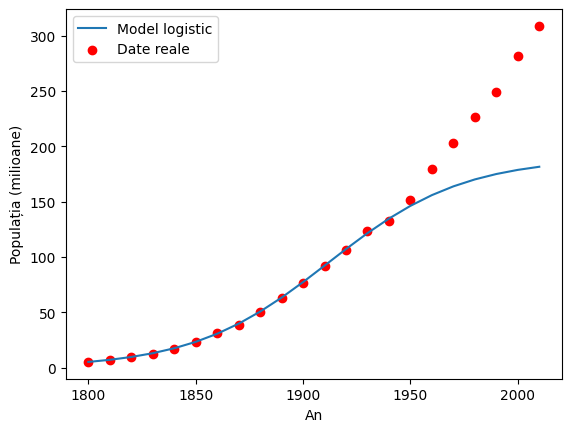

In [ ]:
plt.plot(t_model+1800, P_model, label='Model logistic')
plt.scatter(years_real, P_real, color='red', label='Date reale')
plt.xlabel('An')
plt.ylabel('Populația (milioane)')
plt.legend()
plt.show()


Investigation B: Shorter, more recent calibration window

* Recalibrated the model using 1900–2010 data

*  Achieved significantly improved accuracy

*  Lower relative error across all validation points

*  Demonstrated sensitivity of parameters to calibration period


In [ ]:
t = np.array([-10,0,10,20,30,40,50,60,70,80,90,100])
P = np.array([62.980,76.212,92.228, 106.022, 123.203, 132.165, 151.326,179.323, 203.302, 226.542, 248.710, 281.422])

In [ ]:
P_prime = []
P_mid = []

for i in range(1, len(P)-1):
    derivata = (P[i+1] - P[i-1])/(t[i+1]-t[i-1])
    P_prime.append(derivata)
    P_mid.append(P[i])

P_prime = np.array(P_prime)
P_mid = np.array(P_mid)

print(P_prime)
print(P_mid)

[1.4624  1.4905  1.54875 1.30715 1.40615 2.3579  2.5988  2.36095 2.2704
 2.744  ]
[ 76.212  92.228 106.022 123.203 132.165 151.326 179.323 203.302 226.542
 248.71 ]


In [ ]:
Y=P_prime/P_mid
print(Y)

[0.01918858 0.01616104 0.01460782 0.01060973 0.01063935 0.01558159
 0.01449228 0.01161302 0.01002198 0.01103293]


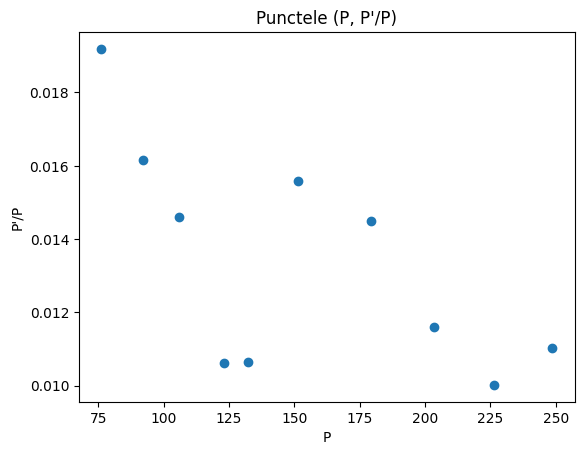

In [ ]:
plt.scatter(P_mid, Y)
plt.xlabel('P')
plt.ylabel("P'/P")
plt.title('Punctele (P, P\'/P)')
plt.show()

In [ ]:
coef = np.polyfit(P_mid, Y, 1)
b = coef[0]
a = coef[1]
print("a =", a)
print("b =", b)

a = 0.01871375453164324
b = -3.45601600678595e-05


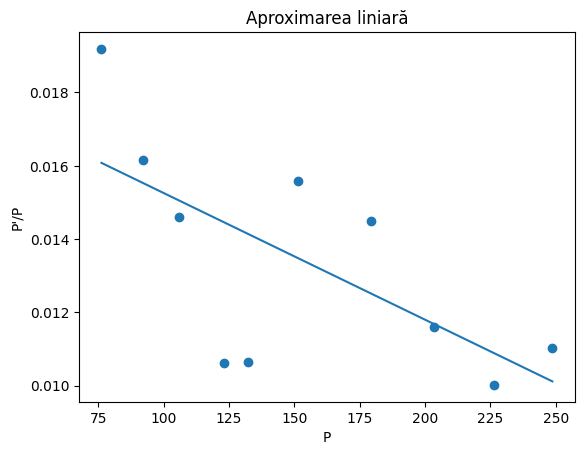

In [ ]:
P_line = np.linspace(min(P_mid), max(P_mid), 100)
Y_line = a + b * P_line

plt.scatter(P_mid, Y)
plt.plot(P_line, Y_line)
plt.xlabel('P')
plt.ylabel("P'/P")
plt.title('Aproximarea liniară')
plt.show()

In [ ]:
def logistic(P, t):
    return a*P + b*P**2

In [ ]:
P0 = P[1]
t_model = np.arange(0, 111, 10)
P_model = odeint(logistic, P0, t_model).flatten()
print(P_model)

[ 76.212       89.30909334 104.15309146 120.80515286 139.2717081
 159.4908866  181.32213644 204.54156379 228.84510116 253.86067585
 279.16899203 304.33074344]


In [ ]:
years_real = np.array([1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010])

P_real = np.array([76.212,92.228,106.022,123.203,132.165,151.326,179.323,203.302,226.542,248.710,281.422,308.745])

In [ ]:
for i in range(len(years_real)):
    print(f"An: {years_real[i]}, Model: {P_model[i]:.2f}, Real: {P_real[i]:.2f}, "
          f"Eroare: {P_model[i]-P_real[i]:.2f}, "
          f"Eroare %: {(P_model[i]-P_real[i])/P_real[i]*100:.2f}%")


An: 1900, Model: 76.21, Real: 76.21, Eroare: 0.00, Eroare %: 0.00%
An: 1910, Model: 89.31, Real: 92.23, Eroare: -2.92, Eroare %: -3.16%
An: 1920, Model: 104.15, Real: 106.02, Eroare: -1.87, Eroare %: -1.76%
An: 1930, Model: 120.81, Real: 123.20, Eroare: -2.40, Eroare %: -1.95%
An: 1940, Model: 139.27, Real: 132.16, Eroare: 7.11, Eroare %: 5.38%
An: 1950, Model: 159.49, Real: 151.33, Eroare: 8.16, Eroare %: 5.40%
An: 1960, Model: 181.32, Real: 179.32, Eroare: 2.00, Eroare %: 1.11%
An: 1970, Model: 204.54, Real: 203.30, Eroare: 1.24, Eroare %: 0.61%
An: 1980, Model: 228.85, Real: 226.54, Eroare: 2.30, Eroare %: 1.02%
An: 1990, Model: 253.86, Real: 248.71, Eroare: 5.15, Eroare %: 2.07%
An: 2000, Model: 279.17, Real: 281.42, Eroare: -2.25, Eroare %: -0.80%
An: 2010, Model: 304.33, Real: 308.75, Eroare: -4.41, Eroare %: -1.43%


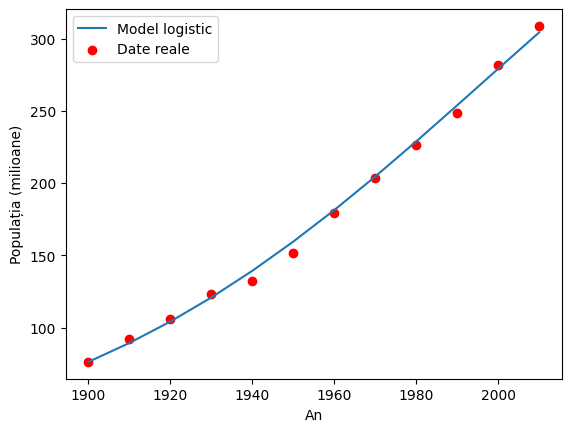

In [ ]:
plt.plot(t_model + 1900, P_model, label='Model logistic')
plt.scatter(years_real, P_real, color='red', label='Date reale')
plt.xlabel('An')
plt.ylabel('Populația (milioane)')
plt.legend()
plt.show()

Investigation C: World population forecasting

Applied the same methodology to global population data

Estimated logistic parameters for world population growth

Generated a forecast for 2040

Compared fitted trajectory against observed historical data

In [4]:
years = np.array([1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015])
P_world = np.array([4.062, 4.440, 4.853, 5.310, 5.735, 6.127, 6.520, 6.930, 7.349])  # miliarde
t=years-1975

In [5]:
P_prime = []
P_mid = []

for i in range(1, len(P_world)-1):
    derivata = (P_world[i+1] - P_world[i-1]) / (t[i+1] - t[i-1])  # P'(ti) ≈ (Pi+1 - Pi-1)/(ti+1 - ti-1)
    P_prime.append(derivata)
    P_mid.append(P_world[i])

P_prime = np.array(P_prime)
P_mid = np.array(P_mid)

print(P_prime)
print(P_mid)

[0.0791 0.087  0.0882 0.0817 0.0785 0.0803 0.0829]
[4.44  4.853 5.31  5.735 6.127 6.52  6.93 ]


In [6]:
Y = P_prime / P_mid
print(Y)

[0.01781532 0.01792706 0.01661017 0.01424586 0.01281214 0.01231595
 0.01196248]


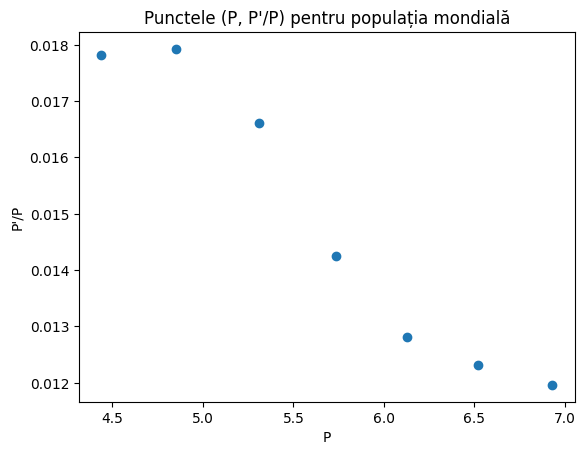

In [7]:
plt.scatter(P_mid, Y)
plt.xlabel('P')
plt.ylabel("P'/P")
plt.title('Punctele (P, P\'/P) pentru populația mondială')
plt.show()

In [8]:
coef = np.polyfit(P_mid, Y, 1)
b = coef[0]
a = coef[1]
print("a =", a)
print("b =", b)

a = 0.03082212243257755
b = -0.002807613232447274


In [9]:
P_line = np.linspace(min(P_mid), max(P_mid), 100)
Y_line = a + b * P_line

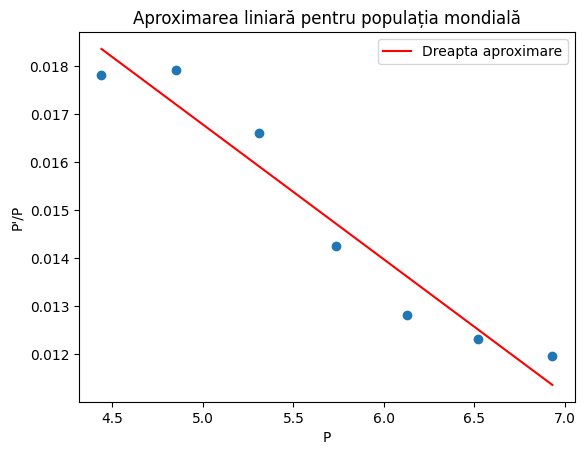

In [10]:
plt.scatter(P_mid, Y)
plt.plot(P_line, Y_line, color='red', label='Dreapta aproximare')
plt.xlabel('P')
plt.ylabel("P'/P")
plt.title('Aproximarea liniară pentru populația mondială')
plt.legend()
plt.show()

In [11]:
def logistic(P, t):
    return a*P + b*P**2

In [12]:
P0 = P_world[0]
t_model = np.arange(0, 2040-1975+1)
P_model = odeint(logistic, P0, t_model)

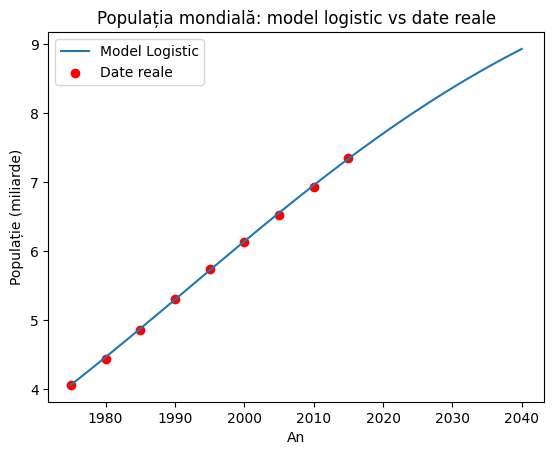

In [13]:
plt.plot(t_model + 1975, P_model, label='Model Logistic')
plt.scatter(years, P_world, color='red', label='Date reale')
plt.xlabel('An')
plt.ylabel('Populație (miliarde)')
plt.title('Populația mondială: model logistic vs date reale')
plt.legend()
plt.show()

In [18]:
print("Populația mondială estimată în 2040:", P_model[65], "miliarde")

Populația mondială estimată în 2040: [8.92790118] miliarde
